### Analysing live data using CURE
Below applies CURE clustering to static data, producing a table with the desired number of clusters and representative points. These representative points are used to classify new live data, which is fed in from a separate q process running the script `load.q`.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
```

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot

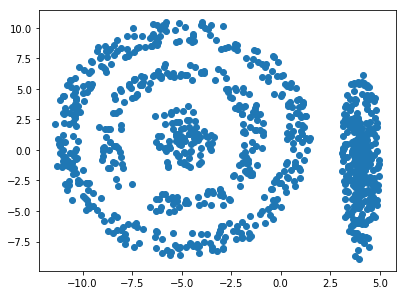

In [2]:
\S 42
dp:1000
dsc:{(y+x?z-y)*/:(cos;sin)@\:4*x?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d@:neg[dp&count d]?count d
plt[`:scatter][;]. flip d;
plt[`:show][];

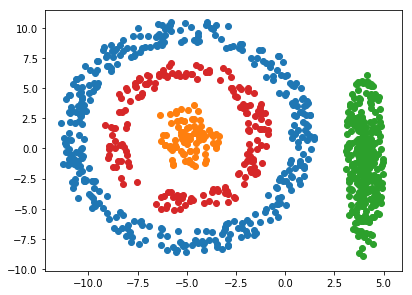

In [3]:
/.clust.cure[data;n clust;dist;n reps;comp;C code?;streaming?]
r:.ml.clust.ccure[d;4;`e2dist;30;0;0b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r;
plt[`:show][];

In [6]:
/run `q load.q` as new process
\p 5001
show newpts:([]pts:();clt:())
classify:{`newpts upsert .ml.clust.clustnew[r;x]}

pts clt
-------


In [7]:
/new data fed in and classified every 5s
newpts

pts                 clt
-----------------------
-10.51692 3.578165  0  
3.884313  -4.136335 2  
-11.02207 -9.266332 0  
-10.25847 -1.75366  0  
2.740864  9.755689  0  
-5.219108 1.266569  1  
-3.714722 6.461427  3  
4.002897  -1.108927 2  
-9.232974 4.53562   0  
3.850709  -1.999233 2  
3.396514  2.065738  2  
-1.454876 5.040204  3  
-7.568453 4.821914  3  
-5.476055 2.757067  1  
4.322633  -3.728358 2  
0.3588372 -3.078407 0  
0.9940138 4.668075  0  
3.766565  1.222878  2  
-5.530019 7.234185  3  
0.9099938 1.44947   0  
..


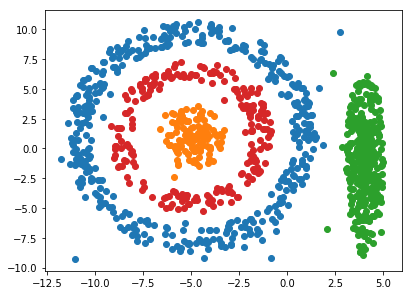

In [8]:
/plot old reps and new pts in clusters
{plt[`:scatter][;]. flip x}each{@[x;key y;,;value y]}.{exec pts by clt from x}each(r;newpts);
plt[`:show][];

In [1]:
/
/recalculate rep pts
.z.ts:{r::.ml.clust.i.repupd[r;newpts;`e2dist;30;0];newpts::0#newpts}
.z.ts[]
{plt[`:scatter][;]. flip x}each exec pts by clt from r;
plt[`:show][];

----